# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. 

* Features are his/her **age and net 401K savings (retirement savings in the U.S.)**

* You though that Support Vector Machines can be a great candidate to solve the problem.

# STEP #2 : Loading Libraries and data

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
        

In [3]:
bank_df = pd.read_csv('dataset/Bank_Customer_Retirement.csv')

In [4]:
bank_df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Customer ID     500 non-null int64
Age             500 non-null float64
401K Savings    500 non-null float64
Retire          500 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.7 KB


In [6]:
bank_df.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


# STEP #3 : Data Visualization

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


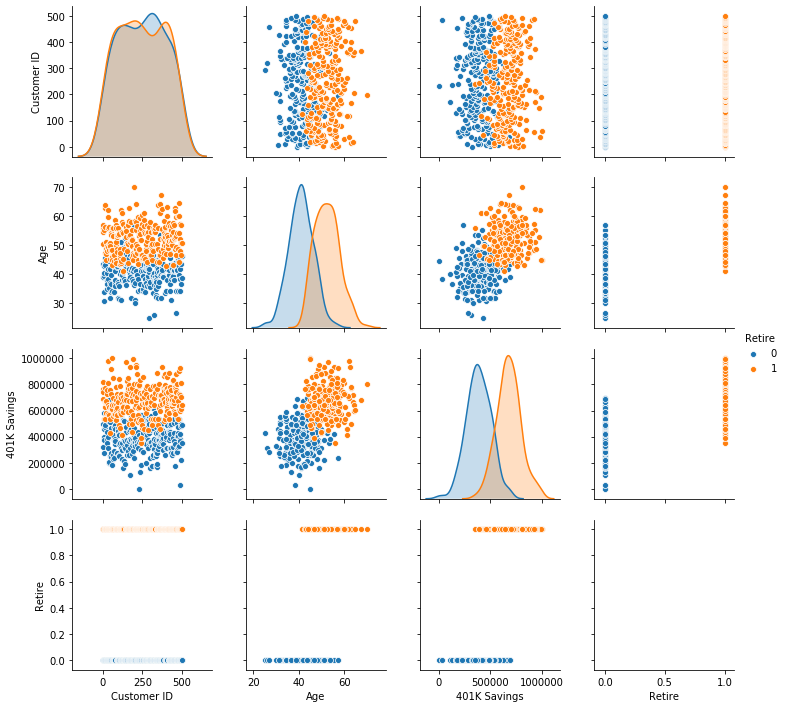

In [8]:
sns.pairplot(bank_df,hue='Retire')

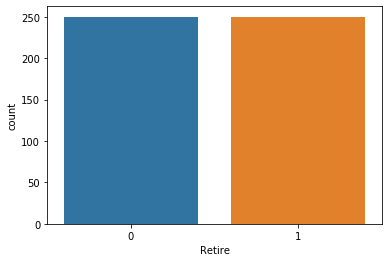

In [9]:
sns.countplot(x='Retire',data= bank_df)

# STEP #4 : MODEL TRAINING

In [10]:
bank_df = bank_df.drop(['Customer ID'],axis=1)

In [12]:
# Let's drop the target label coloumns
X = bank_df.drop(['Retire'],axis=1)
y=bank_df['Retire']

In [13]:
X[:10]

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
5,50.499789,742398.9068
6,39.573302,578650.3156
7,55.159309,533821.2011
8,30.791271,459592.4084
9,40.456073,396800.2509


In [14]:
y[:10]

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    1
8    0
9    0
Name: Retire, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [17]:
y_train.shape

(335,)

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# STEP #5: Evaluating the Model

In [20]:
y_pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

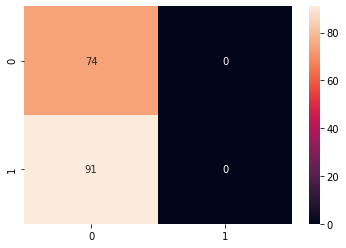

In [21]:
sns.heatmap(cm,annot=True)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        74
           1       0.00      0.00      0.00        91

    accuracy                           0.45       165
   macro avg       0.22      0.50      0.31       165
weighted avg       0.20      0.45      0.28       165



C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# the model shows that is poor , we will try to improve it.

# STEP #6 : Model Improvement

In [24]:
X_min = X_train.min()
X_min

Age             25.0
401K Savings    10.0
dtype: float64

In [25]:
range_train = (X_train-X_min).max()
range_train

Age                 45.0
401K Savings    999990.0
dtype: float64

In [26]:
# Scaling the traning data.
X_train_scaled = (X_train-X_min)/range_train

In [27]:
X_train_scaled[:10]

,Age,401K Savings
471,0.362944,0.508584
26,0.289787,0.382825
7,0.670207,0.533817
453,0.842960,0.782768
108,0.410290,0.597858
37,0.825242,0.980549
157,0.564363,0.787806
489,0.508234,0.368469
118,0.438182,0.576924
114,0.362131,0.569368


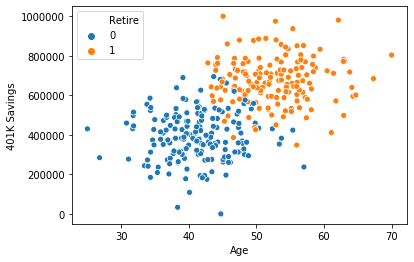

In [28]:
# Simple data
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = y_train)

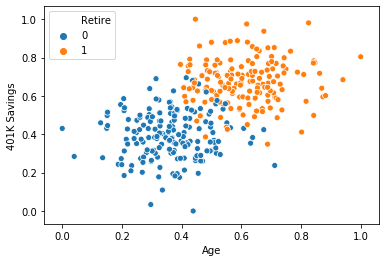

In [29]:
# Scaled Data
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)

In [30]:
# Scaling the test Data
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [31]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model_scaled = SVC()
svc_model_scaled.fit(X_train_scaled, y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
y_predict_scaled = svc_model_scaled.predict(X_test_scaled)

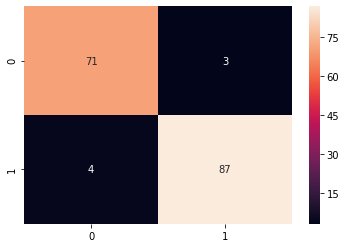

In [33]:
cm = confusion_matrix(y_test,y_predict_scaled)
sns.heatmap(cm,annot=True)

In [34]:
print(classification_report(y_test,y_predict_scaled))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.97      0.96      0.96        91

    accuracy                           0.96       165
   macro avg       0.96      0.96      0.96       165
weighted avg       0.96      0.96      0.96       165



# STEP #7 : Improvement Phase 2- using grid-Search

In [ ]:
svc_model_scaled = SVC()

In [36]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly','rbf','sigmoid']} 

In [37]:
from sklearn.model_selection import GridSearchCV 

In [38]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [39]:
grid.fit(X_train_scaled,y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.929, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.946, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.946, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.937, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0

[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.523, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.527, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.527, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.523, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.527, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.527, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.523, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .

[CV] ..... C=100, gamma=0.001, kernel=poly, score=0.527, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] ..... C=100, gamma=0.001, kernel=poly, score=0.527, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] ..... C=100, gamma=0.001, kernel=poly, score=0.523, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.946, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.938, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.7s finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [44]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [45]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
grid.best_score_

0.9402985074626866

In [47]:
grid_predictions = grid.predict(X_test_scaled)

In [48]:
cm1 = confusion_matrix(y_test, grid_predictions)

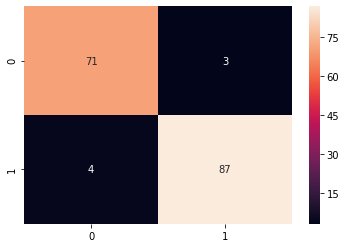

In [49]:
sns.heatmap(cm1,annot=True)

In [50]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.97      0.96      0.96        91

    accuracy                           0.96       165
   macro avg       0.96      0.96      0.96       165
weighted avg       0.96      0.96      0.96       165

